## Predictions on the dataset : ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data : training data(train and old test)

In [5]:
### since it's a regression problem so it means no smote is required and,
### since the train and test data is splited already so, no need for the train_test split from sklearn

In [28]:
df_train = pd.read_csv('../data/clean_train.csv')
df_train.head()

,Unnamed: 0.1,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,0,0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,1,1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,2,2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,4,4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


In [27]:
df_train.to_csv('../data/clean_train.csv')

In [30]:
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [31]:
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


In [32]:
X = df_train.drop('price', axis = 1)
y = df_train['price']

In [33]:
X.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4


In [34]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: price, dtype: float64

### train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [37]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(8010, 15) : (8010,) :: (2671, 15) : (2671,)


### loading the data : eval data(new test data)

In [38]:
X_eval = pd.read_csv('../data/clean_test.csv')

In [39]:
X_eval.drop('Unnamed: 0', axis = 1, inplace = True)

In [40]:
X_eval.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10
1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4
2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23
3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13
4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2


In [14]:
### we cannot use the evluation mterices on this datasetif we using the test dataset from the already provided
### as there's no price provided in that one
### so I will make test data from train data for the evaluation purposes and then after,
### I will use the algorithms on the new test data (basically which is our test data)

### writing the general functions

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [18]:
def eval_metrices(y_test, y_pred) : 
    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))
    print(mean_absolute_error(y_test, y_pred))
    print(root_mean_squared_error(y_test, y_pred))

In [41]:
def plot_graphs(y_test, y_pred, title_suffix=""):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.title(f'Actual vs Predicted Values {title_suffix}')
    plt.legend()
    plt.grid(True)
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.title(f'Trend Comparison {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [44]:
def plot_and_pred(model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_metrices(y_test, y_pred)
    plot_graphs(y_test, y_pred)

## Testing on old data

### Algorithm #1 : Linear regression

### => without hypertunning

In [39]:
### there's no hypertunning available in case of the linear regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

0.5330593099282945
10291246.268509356
2081.105210384082
3207.9972363624875


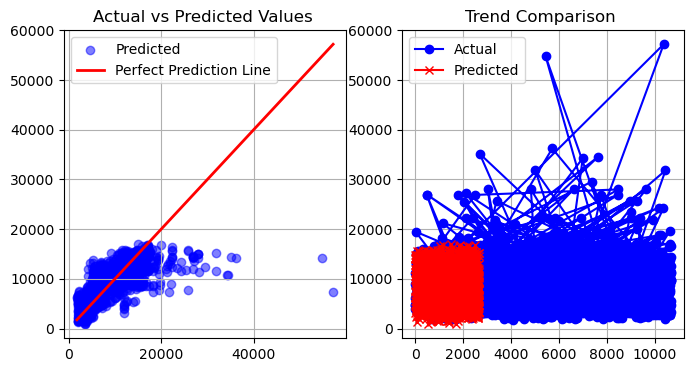

In [45]:
plot_and_pred(lr)

### Algorithm # 2 : SVM regressor

In [40]:
### now in general svm are already slow algorithms, but if we go the hypertunning, 
### the resources and time required will be very long

In [47]:
from sklearn.svm import SVR
svr = SVR()

-0.020537079591391283
22492360.669205155
3648.9522817089223
4742.611165719277


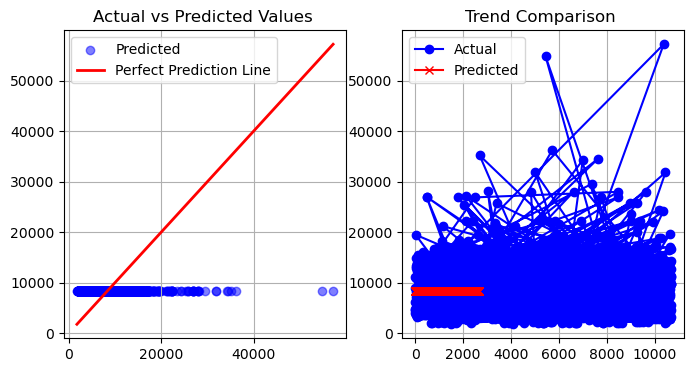

In [48]:
plot_and_pred(svr)

### Algorithm #3 : KNN

### without tunning

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

0.5781985338529272
9296390.005915388
1855.2743541744667
3048.9981970993995


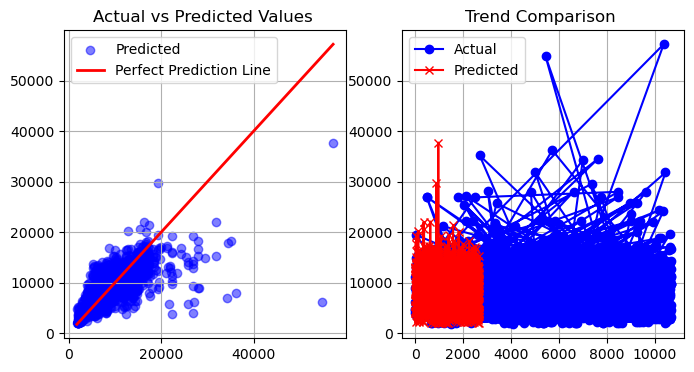

In [50]:
plot_and_pred(knn)

### with tunning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameter_knn = {
    'n_neighbors' : [3,4,5,6,7,8,9,10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size' : [20,30,35,50,65]
}

In [53]:
knn_cv = GridSearchCV(knn, param_grid = parameter_knn, cv = 5, scoring = 'r2')
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
0.5724920378391726


0.5970590059702039
8880710.311628217
1791.5204470886295
2980.0520652546015


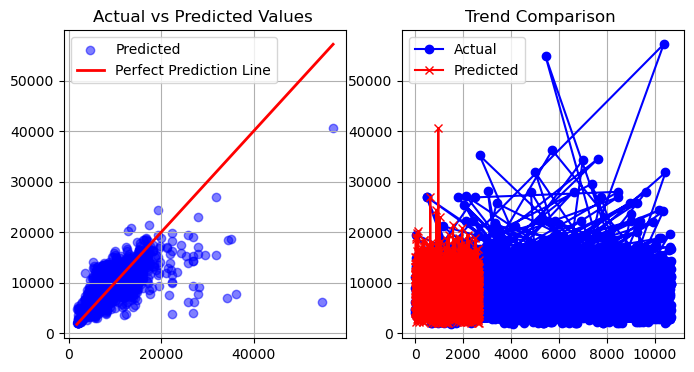

In [54]:
plot_and_pred(knn_cv)

### Algorithm #4 : Random forest regressor

In [59]:
### In this case as well I will also avoid hypertunning in general for the ensemble techniques 
### for the resources and also these algorithms perform the same in both cases

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

0.8618751315301179
3044234.669312566
705.1662652430872
1744.7735295196812


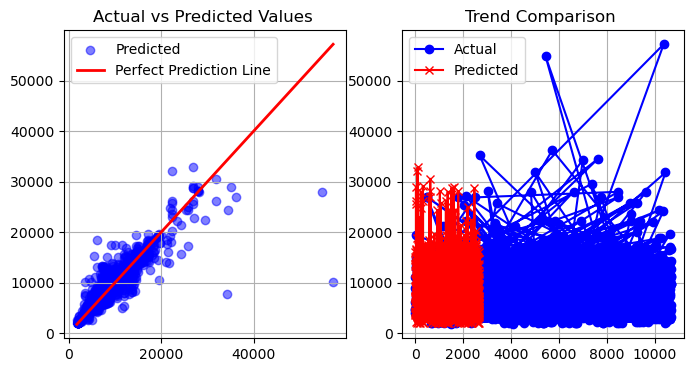

In [57]:
plot_and_pred(rfr)

### Algorithm #5 : Decision tree regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

0.8120842921972939
4141611.2749178424
787.3980406838888
2035.0949056291804


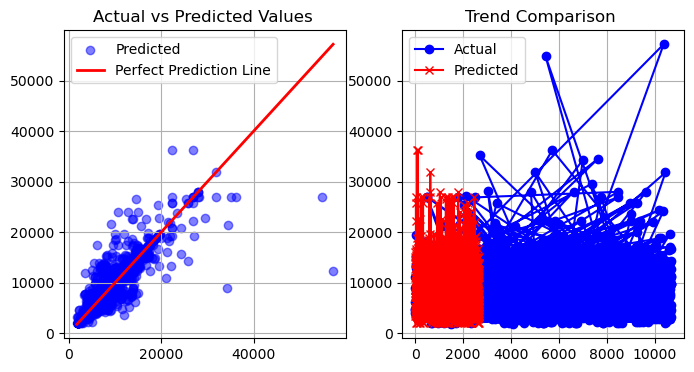

In [59]:
plot_and_pred(dtr)

### Algorithm #6 : Adaboost regression

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

0.22520451693732102
17076282.477550276
3135.213707399657
4132.345880677255


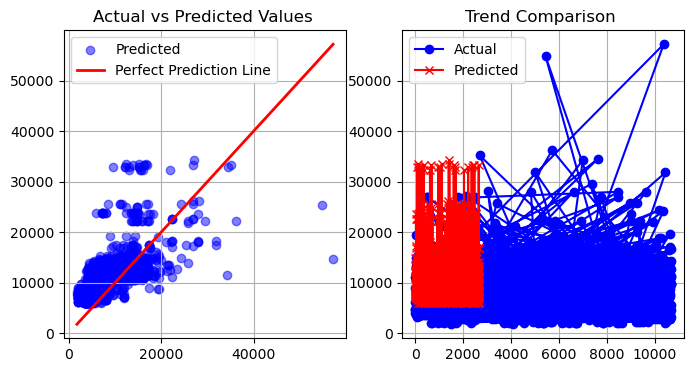

In [61]:
plot_and_pred(abr)

### Algorithm #7 : Gradient boost

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

0.7694121089777303
5082094.628938765
1345.7128168357453
2254.3501566834657


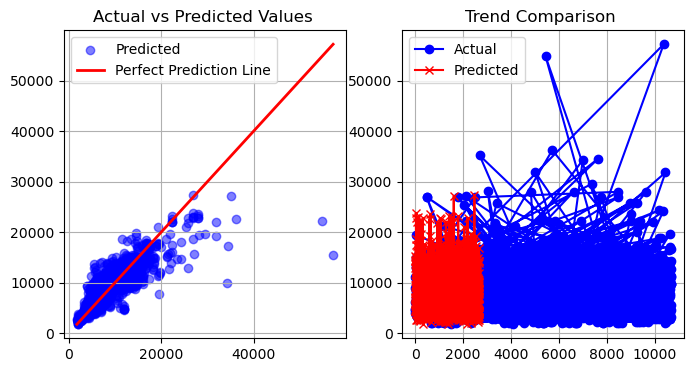

In [63]:
plot_and_pred(gbr)

## Predictions on the Eval dataset

In [55]:
### X_eval is basically where we don't have the price provided already
### from the results above it's clear that Random forest and decision Trees performed overall better
### so we will be taking into the account how much predictions differ from each other

### Decision Tree

In [94]:
y_pred_eval_dtr = dtr.predict(X_eval)
y_pred_eval_dtr

array([14714.,  4226., 12898., ..., 15764., 11050.,  7155.], shape=(2670,))

### Random forest regressor

In [95]:
y_pred_eval_rfr = rfr.predict(X_eval)
y_pred_eval_rfr

array([14714.  ,  4233.64, 12898.  , ..., 15693.65, 12931.45,  7555.31],
      shape=(2670,))

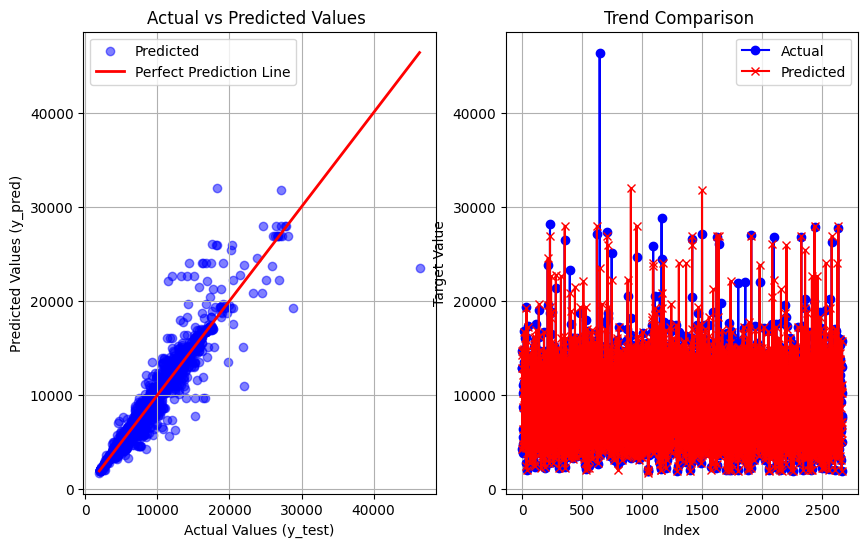

In [96]:
plot_graphs(y_pred_eval_rfr, y_pred_eval_dtr)

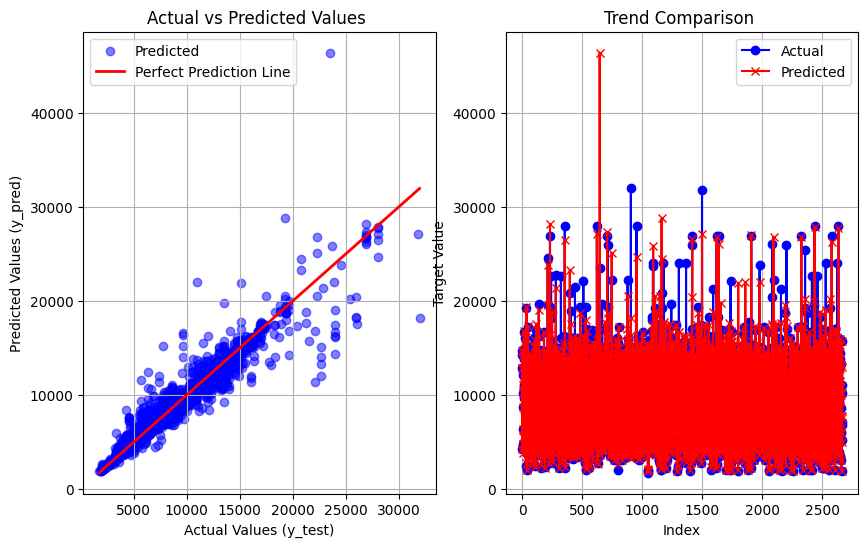

In [97]:
plot_graphs(y_pred_eval_dtr, y_pred_eval_rfr)

### combine plots function

In [110]:
def combine_graphs(y_pred) : 
    #---------vs decison tree predictions
    plot_graphs(y_pred_eval_dtr, y_pred)
    #---------vs Random forest predictions
    plot_graphs(y_pred_eval_rfr, y_pred)

### 1. Linear regression

In [45]:
y_pred_eval_lr = linear_regression.predict(X_eval)

In [46]:
y_pred_eval_lr

array([13811.37986298,  7368.88492251, 11320.57314811, ...,
       15033.56396761, 12663.04758512,  9655.78340657], shape=(2670,))

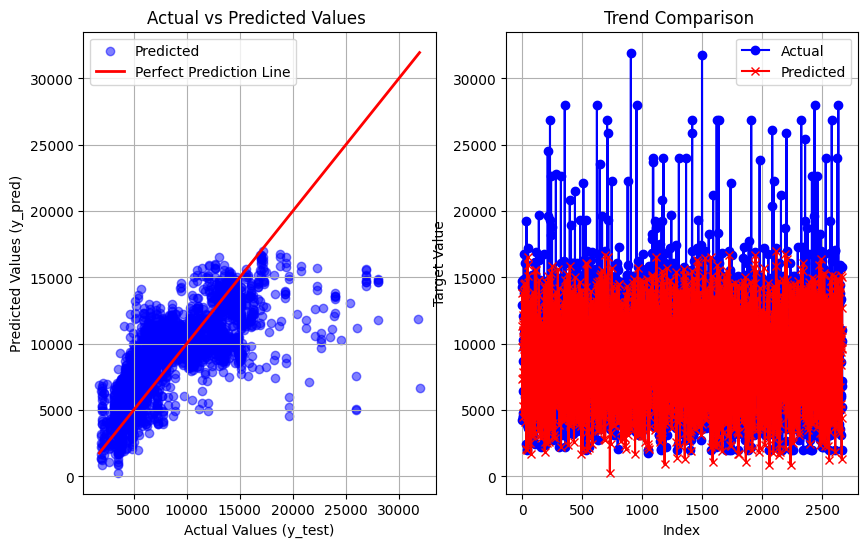

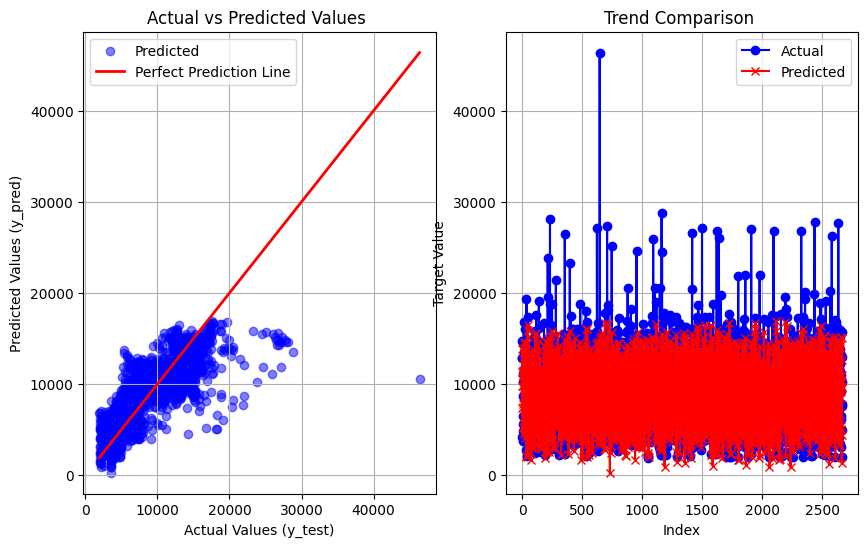

In [111]:
combine_graphs(y_pred_eval_lr)

### 2. SVM Regressor

In [57]:
y_pred_eval_svr = svr.predict(X_eval)

In [58]:
y_pred_eval_svr

array([8371.99700449, 8371.91810056, 8372.47672852, ..., 8371.82223542,
       8372.31643951, 8372.01685125], shape=(2670,))

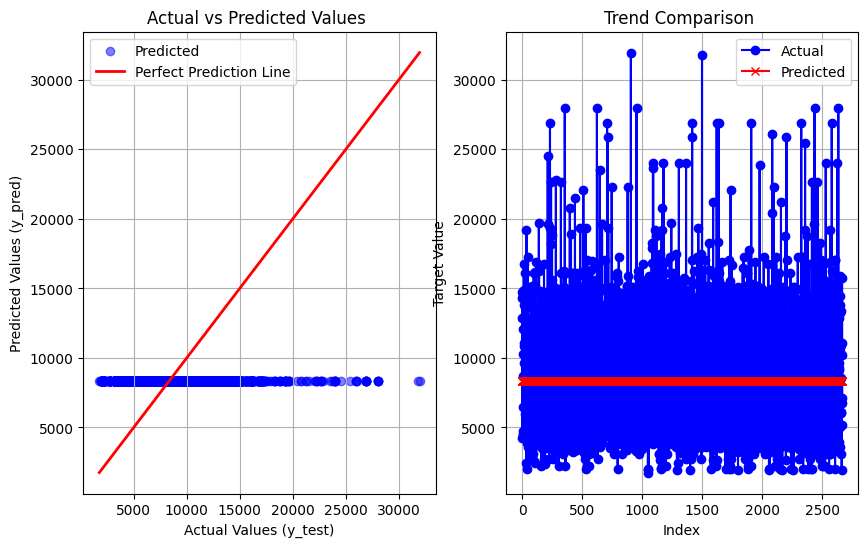

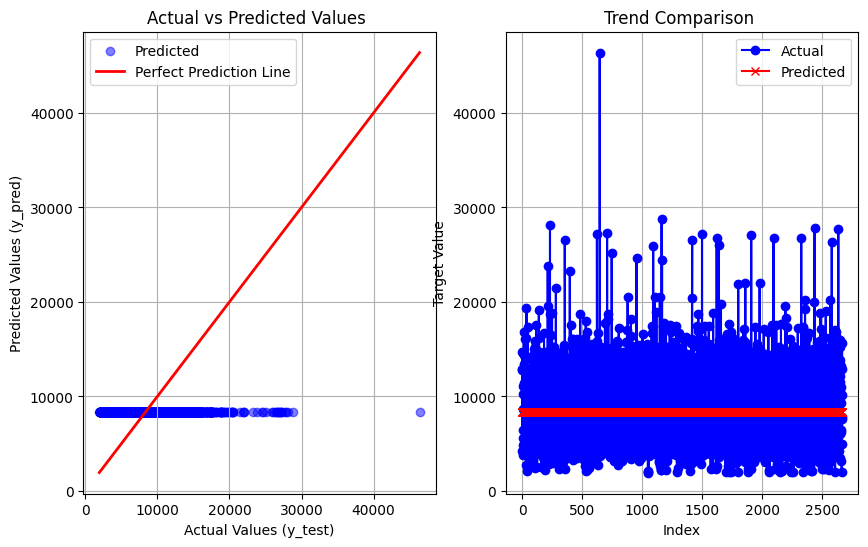

In [112]:
combine_graphs(y_pred_eval_svr)

### 3. KNN neighbors

In [61]:
y_pred_eval_knn = knn.predict(X_eval)

In [62]:
y_pred_eval_knn

array([11702.8,  4826.6, 13899.4, ..., 15617. , 11559.8,  8973.8],
      shape=(2670,))

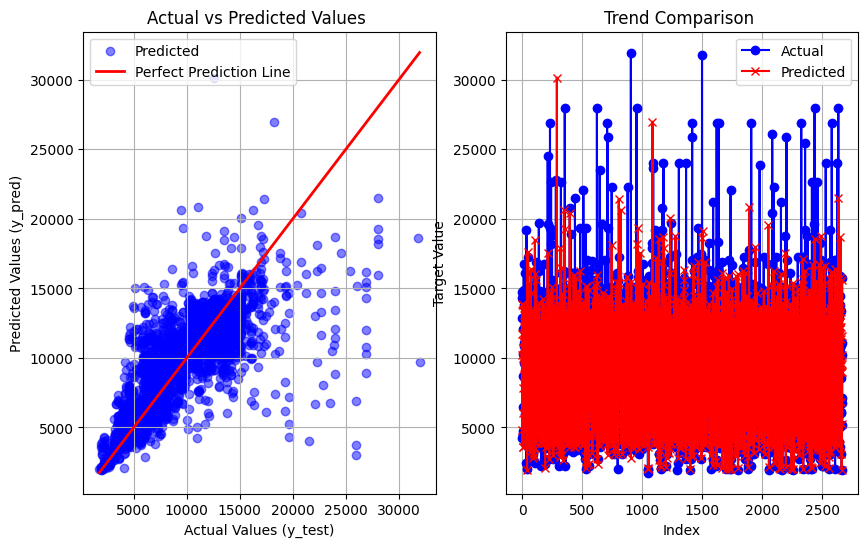

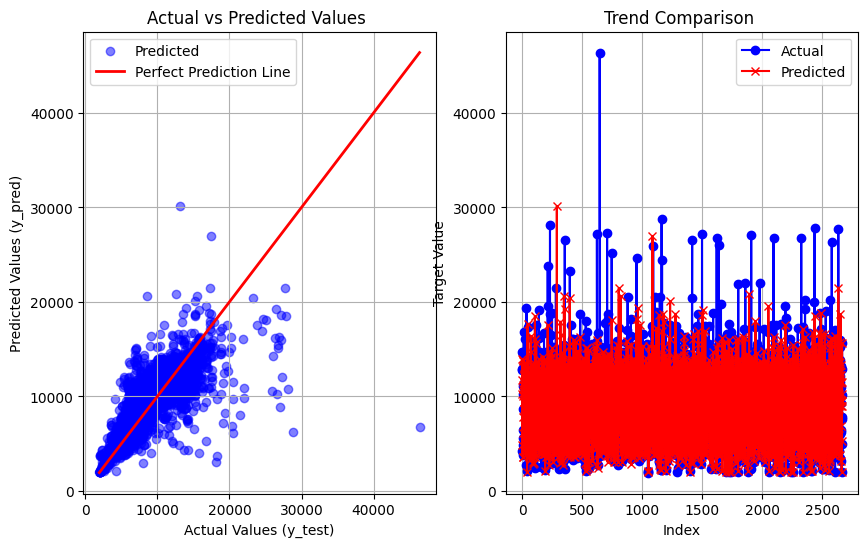

In [113]:
combine_graphs(y_pred_eval_knn)

### 4. Adaboost regressor

In [65]:
y_pred_eval_abr = abr.predict(X_eval)
y_pred_eval_abr

array([14078.19377163,  7660.37076649, 11480.39134547, ...,
       34937.1967921 , 12792.88611644, 11480.39134547], shape=(2670,))

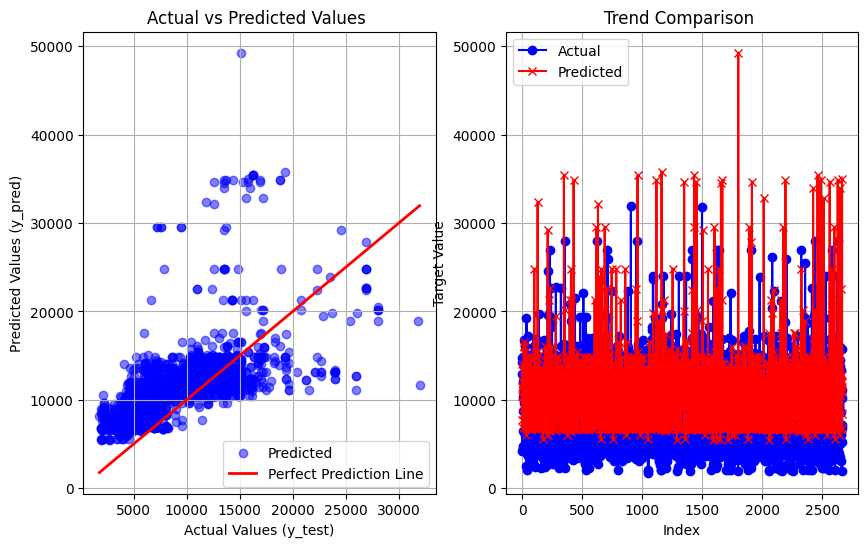

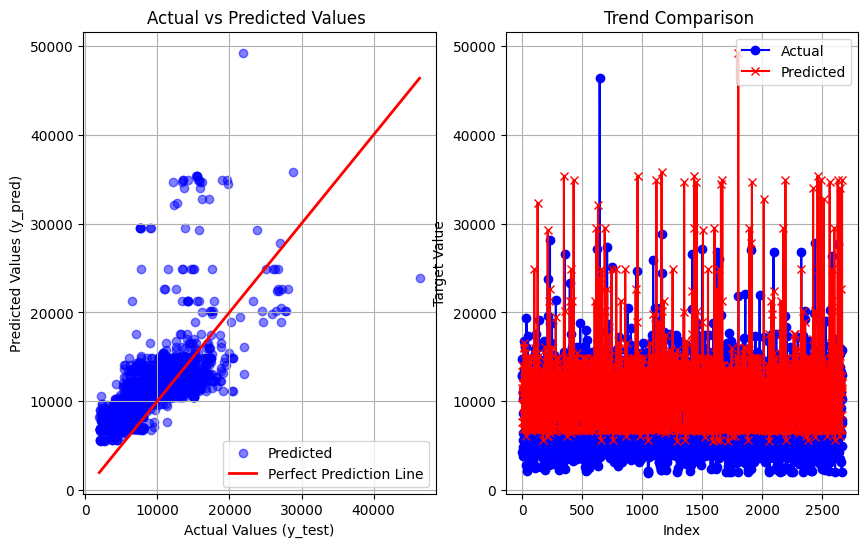

In [114]:
combine_graphs(y_pred_eval_abr)

### 5. Gradient boost regressor

In [69]:
y_pred_eval_gbr  = gbr.predict(X_eval)
y_pred_eval_gbr

array([14008.62357777,  4647.72393566, 11214.2455469 , ...,
       17844.3848323 , 13373.97606265,  9389.60828538], shape=(2670,))

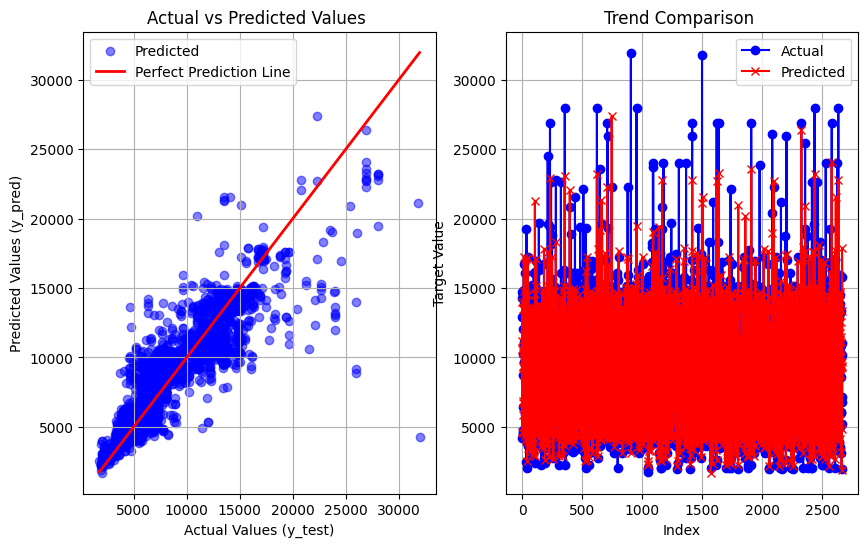

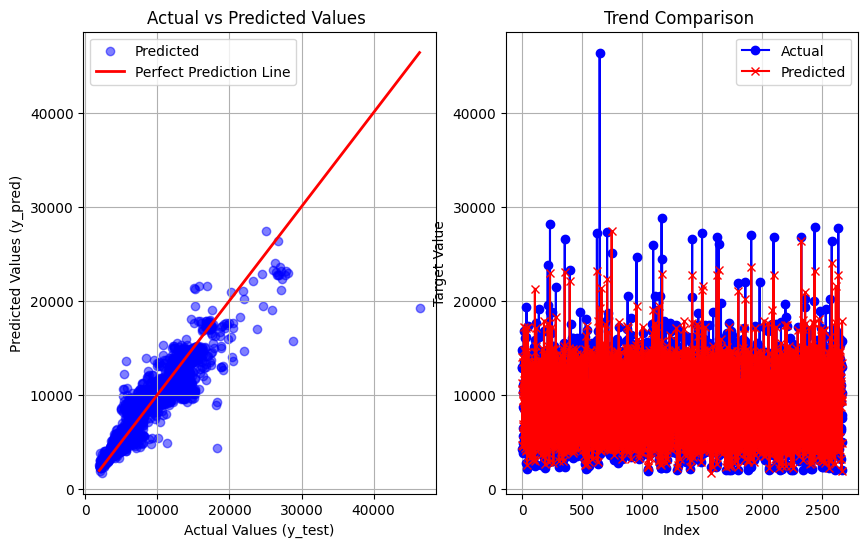

In [115]:
combine_graphs(y_pred_eval_gbr)